In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'ETT-small/ETTh1.csv', index_col=0)

In [4]:
etth1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


<Axes: xlabel='date'>

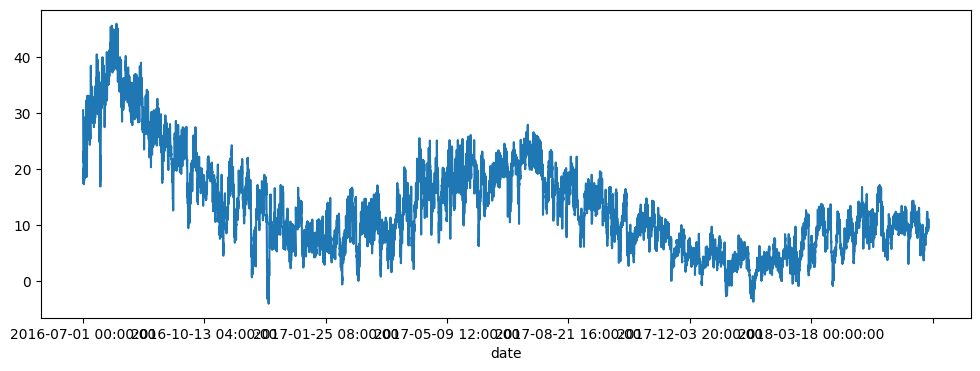

In [5]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [6]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

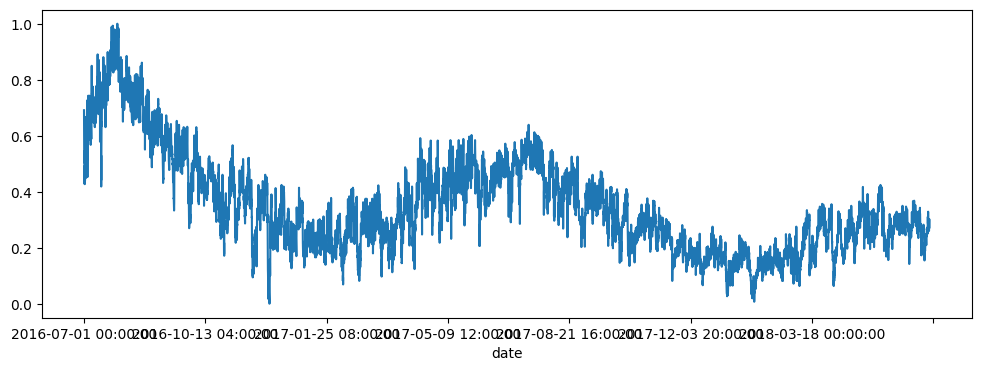

In [7]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [8]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1773108822
Epoch 2, Boundaries delta: 0.0701775435, Codewords delta: 0.0519965353
Epoch 3, Boundaries delta: 0.0476678573, Codewords delta: 0.0390761473
Epoch 4, Boundaries delta: 0.0354671431, Codewords delta: 0.0282739523
Epoch 5, Boundaries delta: 0.0253435061, Codewords delta: 0.0209077428
Epoch 6, Boundaries delta: 0.0186177327, Codewords delta: 0.0161916153
Epoch 7, Boundaries delta: 0.0144996207, Codewords delta: 0.0129053468
Epoch 8, Boundaries delta: 0.0115488880, Codewords delta: 0.0104258344
Epoch 9, Boundaries delta: 0.0095612917, Codewords delta: 0.0087004499
Epoch 10, Boundaries delta: 0.0081789156, Codewords delta: 0.0075057720
Epoch 11, Boundaries delta: 0.0072646847, Codewords delta: 0.0066026499
Epoch 12, Boundaries delta: 0.0064977613, Codewords delta: 0.0058473123
Epoch 13, Boundaries delta: 0.0058442955, Codewords delta: 0.0052839083
Epoch 14, Boundaries delta: 0.0052847236, Codewords delta: 0.0048428459
E

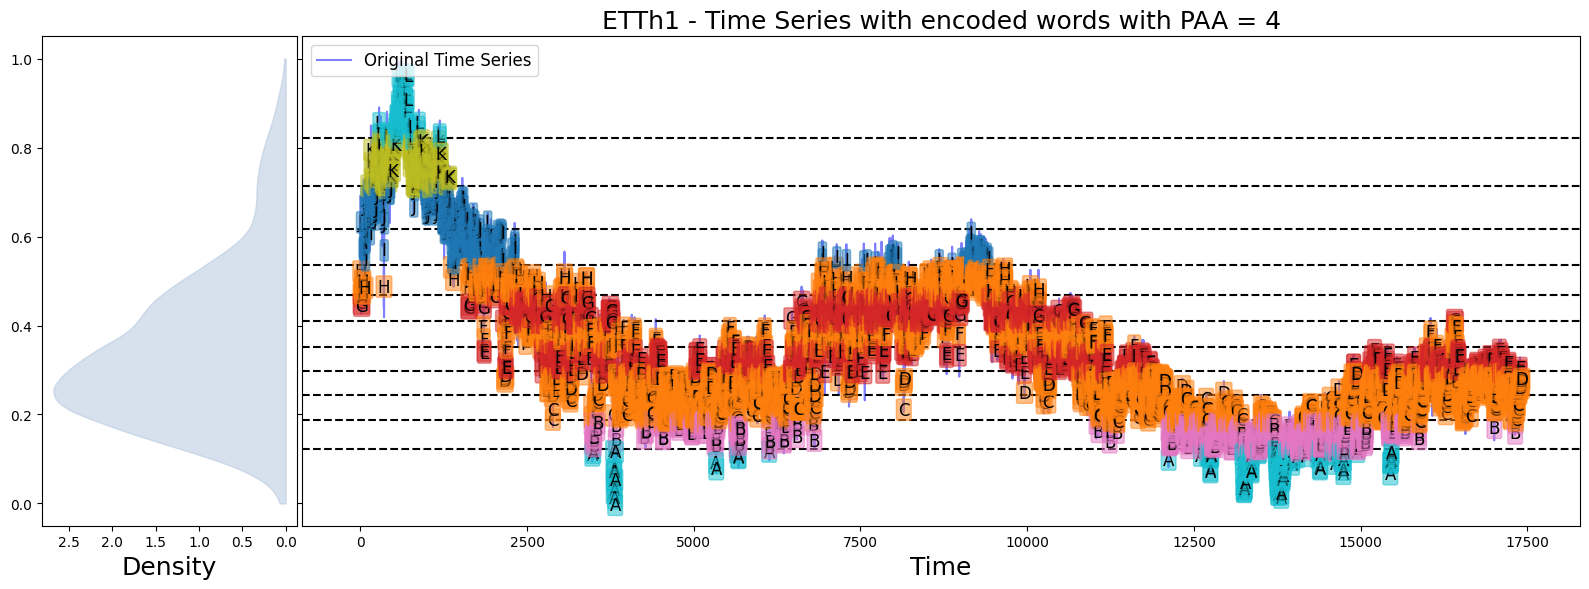

In [18]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh1_ksax.png", data_name='ETTh1')
# kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh1_ksax.csv")

### Stationary

In [9]:
target = scaled_etth1
target = target.diff().dropna()

In [10]:
target.head()

date
2016-07-01 01:00:00   -0.054785
2016-07-01 02:00:00    0.000000
2016-07-01 03:00:00   -0.054765
2016-07-01 04:00:00   -0.061812
2016-07-01 05:00:00   -0.015453
dtype: float64

Epoch 1, Boundaries delta: 0.0697452464, Codewords delta: 0.0669380371
Epoch 2, Boundaries delta: 0.0259373107, Codewords delta: 0.0155814086
Epoch 3, Boundaries delta: 0.0147419942, Codewords delta: 0.0107137490
Epoch 4, Boundaries delta: 0.0100537311, Codewords delta: 0.0080812587
Epoch 5, Boundaries delta: 0.0073302813, Codewords delta: 0.0062216723
Epoch 6, Boundaries delta: 0.0055079453, Codewords delta: 0.0048624829
Epoch 7, Boundaries delta: 0.0042338986, Codewords delta: 0.0038565104
Epoch 8, Boundaries delta: 0.0034131910, Codewords delta: 0.0031020969
Epoch 9, Boundaries delta: 0.0028187815, Codewords delta: 0.0025895372
Epoch 10, Boundaries delta: 0.0023920758, Codewords delta: 0.0022893813
Epoch 11, Boundaries delta: 0.0021449702, Codewords delta: 0.0020425138
Epoch 12, Boundaries delta: 0.0019461840, Codewords delta: 0.0018371533
Epoch 13, Boundaries delta: 0.0017767645, Codewords delta: 0.0016644809
Epoch 14, Boundaries delta: 0.0016306361, Codewords delta: 0.0015178351
E

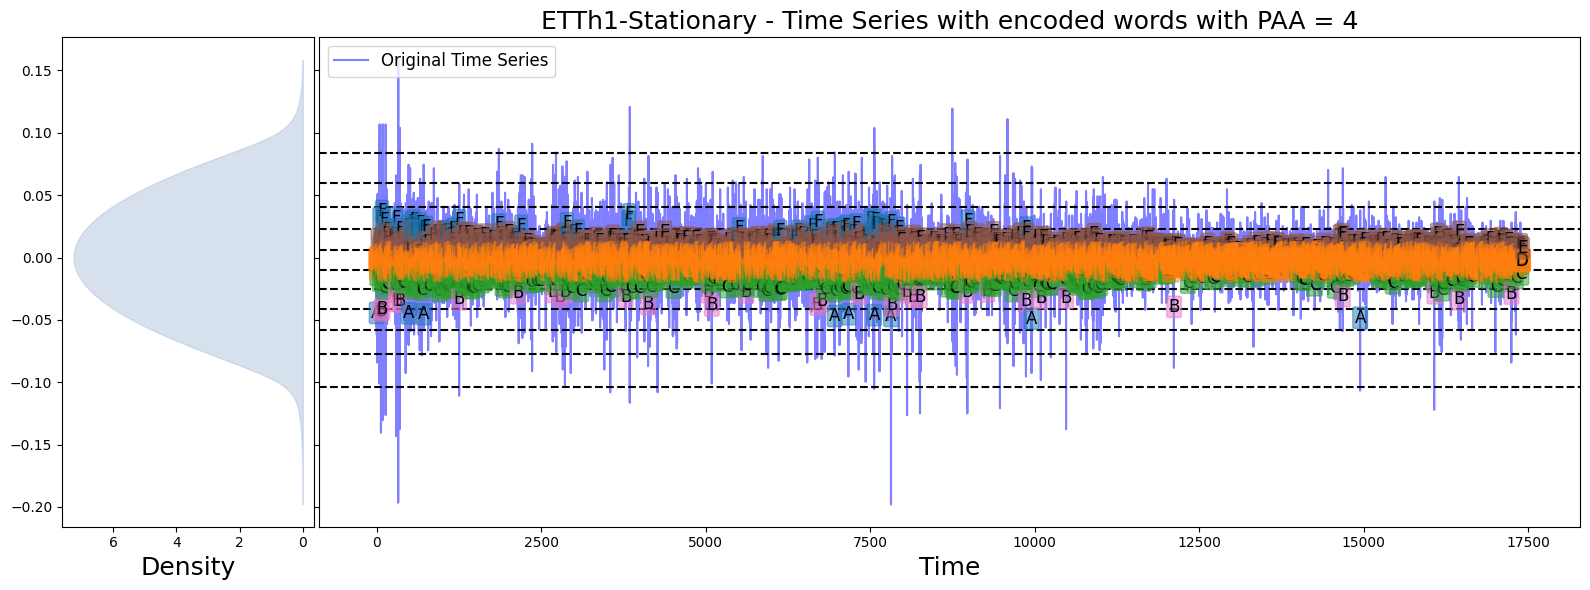

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh1_stationary_ksax.png", data_name='ETTh1-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh1_stationary_ksax.csv")